In [1]:
#Simple Linear Regression

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

import sklearn.metrics as metrics

from statsmodels.graphics.gofplots import qqplot

np.random.seed(42)

In [2]:
#Dataset generation 

beta_0 = 40_000
beta_1 = 2_500
sigma = 6_000
x = np.random.randint(low=0, high=20, size=(100))
noise = np.random.randn(100) * sigma
y = beta_0 + beta_1 * x + noise
y = np.round(y, decimals=2)

In [3]:
# visualizar la info
print("primeros 5 valores de x: %s" % (x[:5]))
print("primeros 5 valores de y: %s" % (y[:5]))


primeros 5 valores de x: [ 6 19 14 10  7]
primeros 5 valores de y: [59875.15 95637.44 74567.94 71021.2  59669.82]


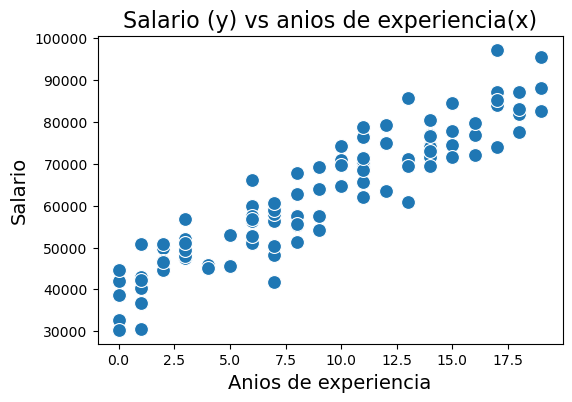

In [5]:
#Visualize the relationship between x (years of experience) and y (salary).
plt.figure(figsize=(6,4))
sns.scatterplot(x=x,y=y,s=100)
plt.xlabel("Anios de experiencia", size=14)
plt.ylabel("Salario", size=14)
plt.title("Salario (y) vs anios de experiencia(x)", size=16)  
plt.show()   


In [4]:
print (x)

[ 6 19 14 10  7  6 18 10 10  3  7  2  1 11  5  1  0 11 11 16  9 15 14 14
 18 11 19  2  4 18  6  8  6 17  3 13 17  8  1 19 14  6 11  7 14  2 13 16
  3 17  7  3  1  5  9  3 17 11  1  9  3 13 15 14  7 13  7 15 12 17 14 12
  8 14 12  0  6  8  0 11  7 10 18 16  7  2  2  0  4  9  6  8  6  8  7 11
  1  0 15  4]


In [4]:
#Create the regression model (Find  β^0 ,  β^1  and  σ^ ).

N= len(y)
mean_x=np.mean(x)
mean_y=np.mean(y)
var_x=np.var(x)
cov_xy=(1 / (N-1))* np.sum((x - mean_x) * (y-mean_x))

In [5]:
# calcular β^1

beta_1_hat= cov_xy / var_x

In [6]:
# calcular β^0

beta_0_hat=mean_y - beta_1_hat* mean_x

In [8]:

# calcular y_pred y sigma (σ^ )

y_pred= beta_0_hat + beta_1_hat * x
sigma_square_hat=(1/N) * np.sum((y- y_pred)**2)
sigma_hat=np.sqrt(sigma_square_hat)

In [9]:
#ver los parametros estimados
print("b0 = %.2f" %(beta_0_hat))
print("b1 = %.2f" %(beta_1_hat))
print("std = %.2f" %(sigma_hat))



b0 = 39498.89
b1 = 2566.14
std = 5711.22


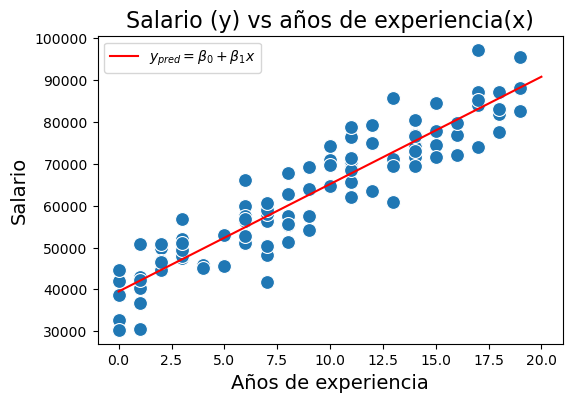

In [11]:
# Plot the resulting model.

plt.figure(figsize=(6,4))
plt.xlabel("Años de experiencia", size=14)
plt.ylabel("Salario", size=14)
plt.title("Salario (y) vs años de experiencia(x)", size=16)  

sns.scatterplot(x=x,y=y,s=100)

#graficar el modelo
x_line = np.linspace(0, 20, 100)
y_line=beta_0_hat + beta_1_hat * x_line
sns.lineplot(x=x_line, y=y_line, color="red", label=r"$y_{pred} = \beta_0 + \beta_1 x$")

#graficar las fronteras de la desv est
#sns.lineplot(x=x_line, y=y_line + sigma_hat, linestyle='--', color="green", label=r"$y_{pred} = \pm + \sigma$")
#sns.lineplot(x=x_line, y=y_line - sigma_hat, linestyle='--', color="green")

plt.show()  

In [20]:
# Evaluate the goodness of fit.

#R2  score:

r2_score=metrics.r2_score(y, y_pred)
print("R2 score= %.2f" % (r2_score))



R2 score= 0.86


In [22]:
# Mean squared error:

mse=metrics.mean_squared_error(y, y_pred)
print("Mean squared error= %.2f" % (mse))

Mean squared error= 32618063.36


In [25]:
# Root mean squared error:
rmse=np.sqrt(mse)
print("Root mean squared error= %.2f" % (rmse))


Root mean squared error= 5711.22


In [26]:
#Residuals:

residuals=y-y_pred

In [27]:
# Residual mean  μϵ  and standard deviation  σϵ :
mean_r=np.mean(residuals)
std_r=np.std(residuals)
print("Media y desviacion estandar de los residuos= %.2f, %.2f" % (mean_r, std_r))

Media y desviacion estandar de los residuos= -0.00, 5711.22


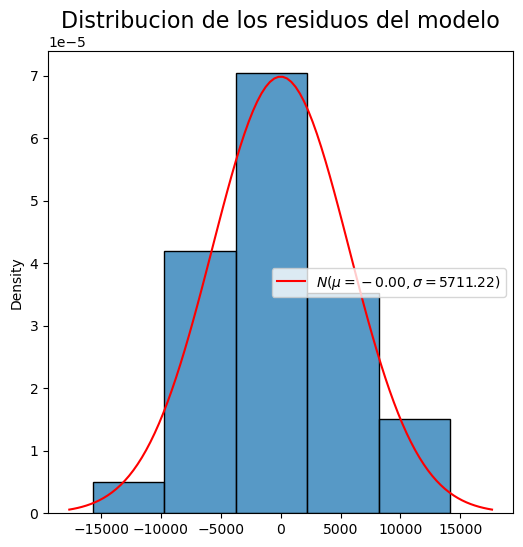

In [37]:
#graficar los residuos

plt.figure(figsize=(6,6))
plt.title("Distribucion de los residuos del modelo", size=16)  
norm=stats.norm(loc=mean_r, scale=std_r)

x_line = np.linspace(norm.ppf(.001), norm.ppf(.999), 100)
sns.lineplot(x=x_line, y=norm.pdf(x_line), color="red", label=r"$N (\mu= %.2f , \sigma= %.2f)$" % (mean_r, std_r))

sns.histplot(residuals, kde=False,stat="density", bins=5)
plt.show()   

#y_line=beta_0_hat + beta_1_hat * x_line


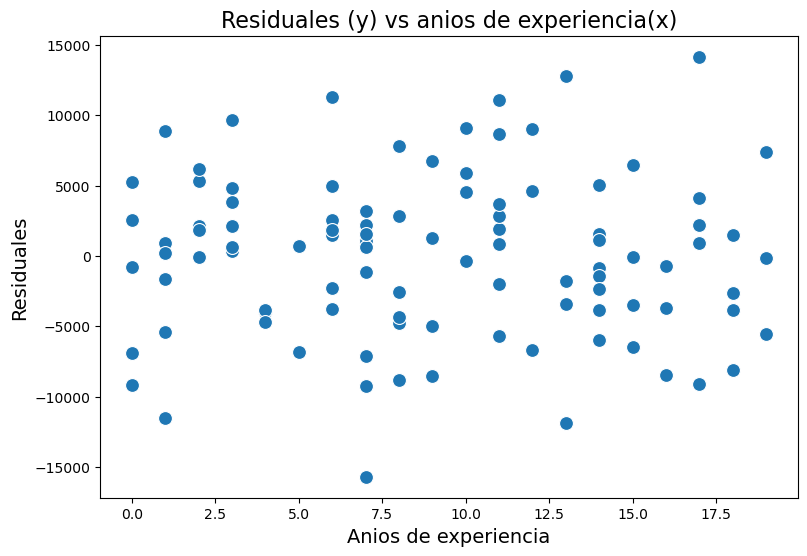

In [38]:
#analizar los residuos

plt.figure(figsize=(9,6))
sns.scatterplot(x=x,y=residuals,s=100)

plt.xlabel("Anios de experiencia", size=14)
plt.ylabel("Residuales", size=14)
plt.title("Residuales (y) vs anios de experiencia(x)", size=16)  

plt.show()   

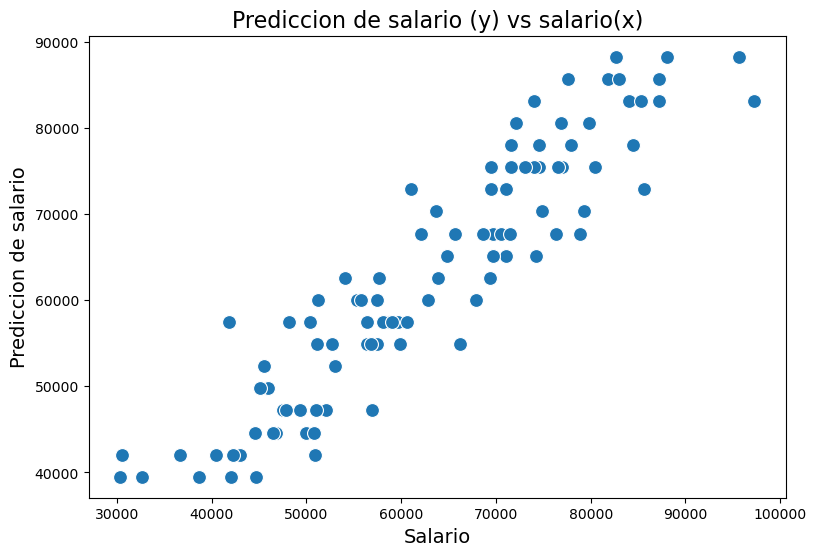

In [39]:
#analizar  la relacion entre el salario y el pronostico del salario obtenido del modelo

plt.figure(figsize=(9,6))
sns.scatterplot(x=y,y=y_pred,s=100)

plt.xlabel("Salario", size=14)
plt.ylabel("Prediccion de salario", size=14)
plt.title("Prediccion de salario (y) vs salario(x)", size=16)  

plt.show()   

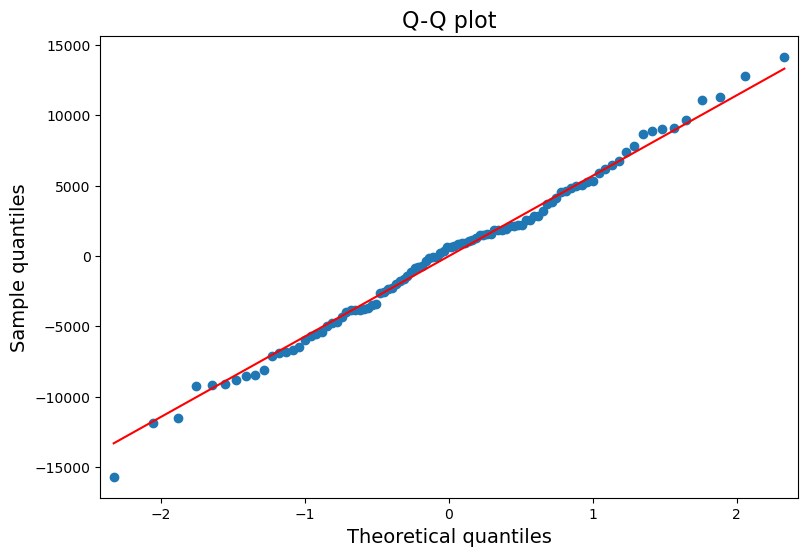

In [40]:
fig=qqplot(residuals,line='s')

fig.set_size_inches(9,6)

plt.xlabel("Theoretical quantiles", fontsize=14)
plt.ylabel("Sample quantiles", fontsize=14)
plt.title("Q-Q plot", size=16)  
plt.show()